# Test the gaussianity of a map

On veut évaluer à quel point une carte $S$ est non gaussienne. Pour cela, on construit une carte $S'$ qui a le même spectre de puissance que la carte $S$ mais qui est gaussienne puis on compare les stats de $S$ et $S'$.

Pour construire $S'$, on utilise une carte de bruit blanc.



In [2]:
%matplotlib notebook

from jax import jit, config, grad
config.update("jax_enable_x64", True)

import numpy as np
import healpy as hp
from matplotlib import pyplot as plt
from importlib import reload
import pynkowski as mf   # For Minkowski Functionals
#import camb

import scatcovjax.Sphere_lib as sphlib
import scatcovjax.Synthesis_lib as synlib
import scatcovjax.Fast_scattering_lib as scatlib

import s2fft

import scatcovjax.plotting as plot
plot.notebook_plot_format()

In [3]:
import jaxlib
jaxlib.__file__

'/obs/lmousset/miniconda3/envs/jax/lib/python3.10/site-packages/jaxlib/__init__.py'

In [4]:
import jax
# Check we're running on GPU
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

gpu


# Planar map

Map at redshift z=0.14677950739860535
Mean and STD: 0.000 and 1.000


<IPython.core.display.Javascript object>


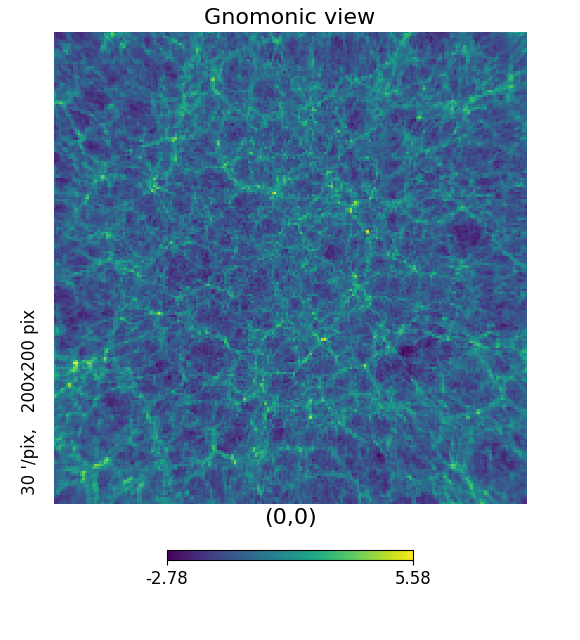

In [4]:
### Build a flat map with structures
repo = '/travail/lmousset/CosmoGrid/CosmoFiducial_barionified_nside512/'
f_target, flm_target = sphlib.make_CosmoGrid_sky(L=512, dirmap=repo, run=0, idx_z=10, sampling='healpix', 
                                   nest=False, normalize=True, reality=True)
#hp.mollview(f_target)
S = hp.gnomview(f_target, reso=30, return_projected_map=True)



In [ ]:
S = np.random.randn(200, 200)

<IPython.core.display.Javascript object>


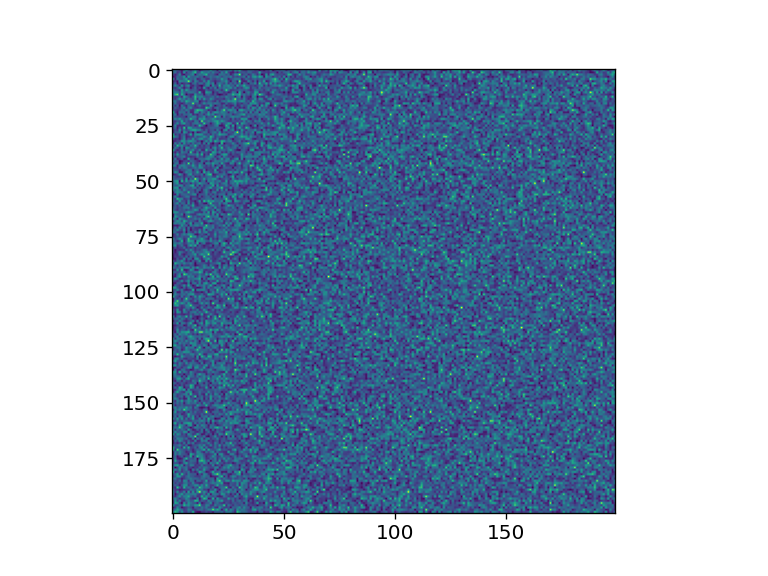

In [28]:
### Fourier transform

ft_S = np.fft.fftshift(np.fft.fft2(S))
plt.figure()
plt.imshow(np.abs(ft_S))


[[-2.00029901e+00  1.01192503e-01 -1.90299749e-01 ... -4.70700321e-01
  -1.84374998e-01  6.13122354e-01]
 [ 7.07248826e-01  9.42937123e-01  1.34114690e+00 ... -1.20704851e-01
  -6.64715847e-01 -1.43712379e-01]
 [ 1.76437722e-01 -8.12081087e-01 -2.97118041e+00 ... -6.76085414e-02
  -1.31527980e+00  1.21341793e+00]
 ...
 [ 5.73363063e-02 -1.68173711e+00 -7.50613466e-01 ... -8.00213979e-01
  -4.80712248e-01  8.31180938e-01]
 [-1.34364755e-03  1.29601476e+00  9.90601331e-01 ... -1.70900412e-01
   9.36434106e-01  9.56175615e-01]
 [-3.90093718e-02  3.75775174e-01  2.47299661e-01 ... -6.24237926e-01
   1.38802372e+00 -1.49405558e+00]]


<IPython.core.display.Javascript object>


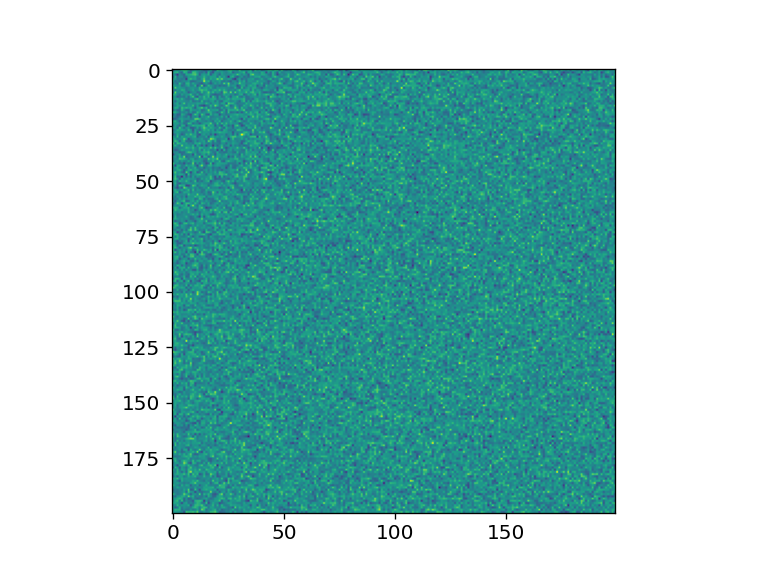

In [29]:
### White noise
wn = np.random.randn(200, 200)
ft_wn = np.fft.fftshift(np.fft.fft2(wn))
print(wn)

plt.figure()
plt.imshow(wn)

In [30]:
### Make S'
# TF(S') = |TF(S)| x TF(wn) / | TF(wn)|

ft_Sprime = np.abs(ft_S) * ft_wn / np.abs(ft_wn)

Sprime = np.fft.ifft2(np.fft.fftshift(ft_Sprime))

In [6]:
Sprime

array([[ 1.51029447-4.62683707e-16j,  1.19609428-3.65065300e-16j,
         0.87370815+8.85021607e-18j, ...,  1.46674489-3.31630433e-16j,
         1.02007143-3.93541954e-16j,  0.70309309-5.28907375e-17j],
       [ 2.41015235+1.42093407e-16j,  1.76632034-4.60893922e-16j,
         1.59175058+1.23530478e-16j, ...,  0.91335415+1.25606714e-15j,
         1.29908788-3.29766944e-16j,  1.60590598-1.54935040e-16j],
       [ 1.53023046-5.41216339e-17j,  0.79853732-1.42348244e-17j,
         1.41920228+6.65818133e-17j, ...,  1.01467398-1.53994749e-16j,
        -1.59081841+2.90355430e-16j, -0.15814988+3.99967697e-19j],
       ...,
       [ 0.03495547-7.26304281e-16j,  0.44962892-1.65082344e-16j,
         1.5832232 -9.33233451e-16j, ...,  0.49520122+6.25333801e-16j,
         2.41480473+5.26857311e-16j,  1.69370748-3.80612290e-16j],
       [ 1.38653612-1.45340947e-16j,  0.06132422-8.25952568e-16j,
         0.86737096-7.54623493e-18j, ...,  1.35894446-1.25265070e-16j,
         2.58049118-1.77691695e-16j

<IPython.core.display.Javascript object>


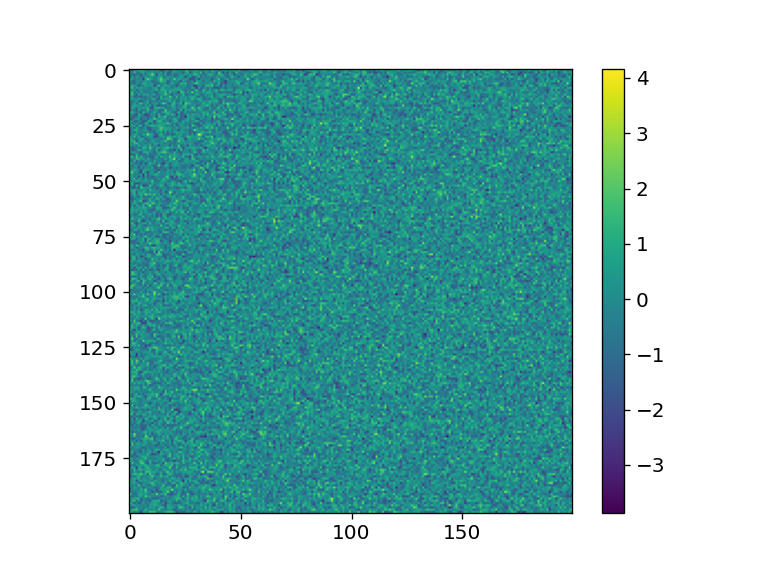

In [32]:
plt.figure()
plt.imshow(np.real(Sprime))
plt.colorbar()

<IPython.core.display.Javascript object>


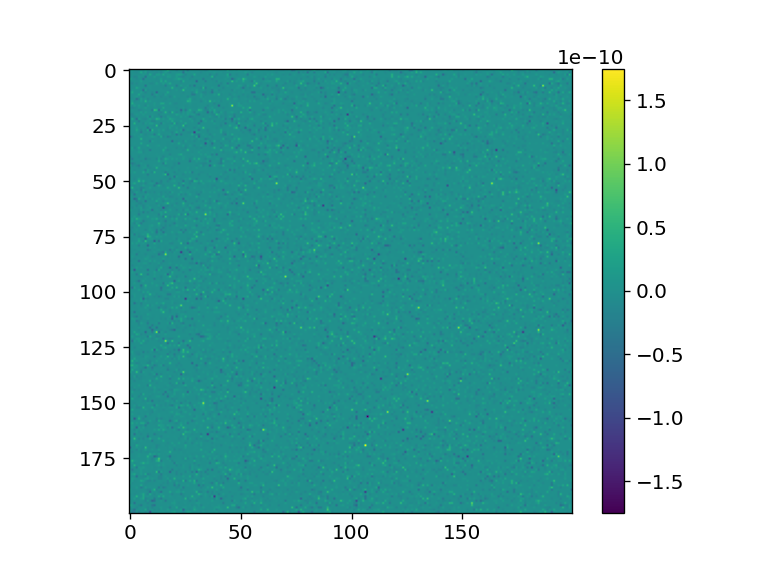

In [33]:
### Check the PS
ps_S = np.abs(ft_S)**2
ps_Sprime = np.abs(ft_Sprime)**2

plt.figure()
plt.imshow(ps_S - ps_Sprime)
plt.colorbar()

<IPython.core.display.Javascript object>


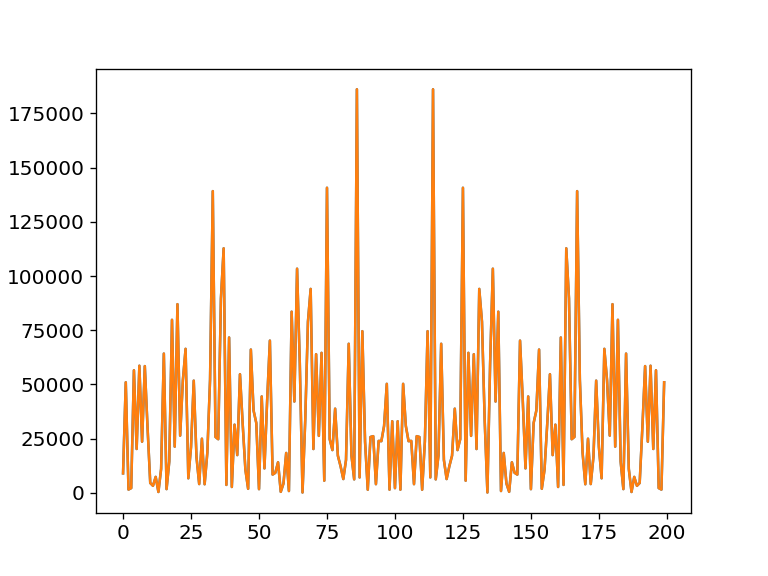

In [34]:
plt.figure()
plt.plot(ps_S[100, :])
plt.plot(ps_Sprime[100, :])

<IPython.core.display.Javascript object>


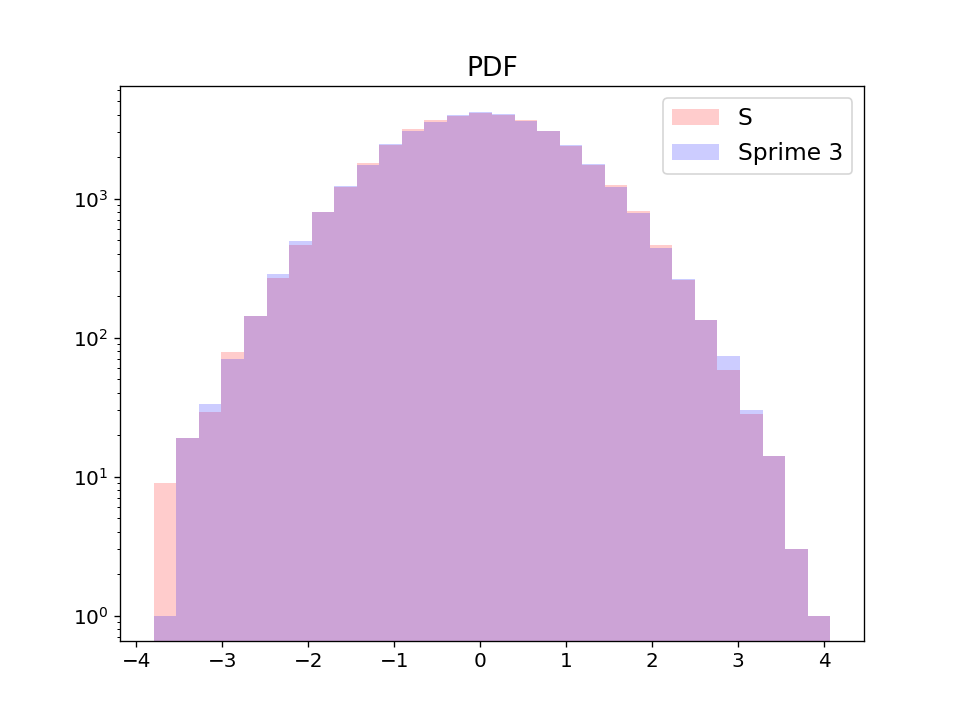

In [38]:
fig, ax0 = plt.subplots(1, 1, figsize=(8, 6))


ax0.hist(S.ravel(), bins=30, range=(S.min(), S.max()), 
         density=False, color='r', alpha=0.2, label=f'S')
ax0.hist(Sprime.ravel(), bins=30, range=(S.min(), S.max()), 
         density=False, color='b', alpha=0.2, label=f'Sprime')
ax0.set_title('PDF')
ax0.set_yscale("log")
#ax0.set_ylim(10, 2e5)
ax0.legend()

# Spherical maps

In [9]:
L = 32
nside = L//2

## LSS map

In [11]:
reload(sphlib)
repo = '/travail/lmousset/CosmoGrid/CosmoFiducial_barionified_nside512/'
S, S_lm = sphlib.make_CosmoGrid_sky(L=L, dirmap=repo, run=0, idx_z=10, sampling='healpix', 
                                 nest=False, normalize=True, reality=True)
#In the function above, if reality=True, only positive m are stored
print(S_lm.shape)
S_lm = sphlib.make_flm_full(S_lm, L)
print(S_lm.shape)

Map at redshift z=0.14677950739860535
Mean and STD: -0.000 and 1.000
(32, 32)
(32, 63)


## Planet 

In [8]:
planet='venus'
S, S_lm = sphlib.make_planet(L, planet, sampling='healpix', nside=nside, normalize=True, reality=True)
# print('Target = Planet map')

#In the function above, if reality=True, only positive m are stored
print(S_lm.shape)
S_lm = sphlib.make_flm_full(S_lm, L)
print(S_lm.shape)

2024-01-15 16:38:00.489232: E external/xla/xla/stream_executor/cuda/cuda_dnn.cc:459] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2024-01-15 16:38:00.489308: E external/xla/xla/stream_executor/cuda/cuda_dnn.cc:463] Memory usage: 2818048 bytes free, 34089926656 bytes total.
2024-01-15 16:38:00.489522: E external/xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Possibly insufficient driver version: 520.61.5


XlaRuntimeError: FAILED_PRECONDITION: DNN library initialization failed. Look at the errors above for more details.

## Lensing

In [6]:
from astropy.io import fits
InputDir = '/travail/lmousset/Ulagam/'
image_file = fits.open(InputDir+'kappa_00099.fits')
S = hp.read_map(image_file)

S = hp.ud_grade(S, nside_out=nside)
S = sphlib.normalize_map(S)
#hp.mollview(S, min=None, max=None, title='S')

### Get the Slm
S_lm = s2fft.forward_jax(S, L=L, nside=nside, reality=True, sampling='healpix')

### Inverse transform to kill small scales and have same power in S and Slm
S = s2fft.inverse_jax(S_lm, L=L, nside=nside, reality=True, sampling='healpix')


Mean and STD: 0.000 and 1.000


## NASA map downloaded at https://lambda.gsfc.nasa.gov/simulation/full_sky_sims_ov.html

Maps are provided in Healpix format, Nside=4096

- CIB at 27, 100 and 353 GHz
- Radio Sources at 27, 100 and 353 GHz
- CMB lensing convergence
- Lensed CMB
- kSZ
- tSZ

In [5]:
### Load a fits image from NASA
from astropy.io import fits
#from astropy.utils.data import get_pkg_data_filename

### CMB
#image_file = get_pkg_data_filename('/travail/lmousset/NASAsimu/148_unlensedcmb_healpix.fits')

### CIB
#image_file = get_pkg_data_filename('/travail/lmousset/NASAsimu/100_ir_pts_healpix_nopell_Nside4096_DeltaT_uK_lininterp_CIBrescale0p75.fits')

### Radio Sources
image_file = fits.open('/travail/lmousset/NASAsimu/353_rad_pts_healpix_nopell_Nside4096_DeltaT_uK_fluxcut148_7mJy_lininterp.fits')

### kSZ
#image_file = get_pkg_data_filename('/travail/lmousset/NASAsimu/148_ksz_healpix_nopell_Nside4096_DeltaT_uK.fits')

### tSZ
#image_file = get_pkg_data_filename('/travail/lmousset/NASAsimu/tSZ_skymap_healpix_nopell_Nside4096_y_tSZrescale0p75.fits')

### CMB lensing convergence
#image_file = get_pkg_data_filename('/travail/lmousset/NASAsimu/healpix_4096_KappaeffLSStoCMBfullsky.fits')

### Lensed CMB
#image_file = get_pkg_data_filename('/travail/lmousset/NASAsimu/Sehgalsimparams_healpix_4096_KappaeffLSStoCMBfullsky_phi_SimLens_Tsynfastnopell_fast_lmax8000_nside4096_interp2.5_method1_1_lensed_map.fits')


S = hp.read_map(image_file, 0, h=False)
S = hp.ud_grade(S, nside_out=nside)
S = sphlib.normalize_map(S)
#hp.mollview(S, min=None, max=None, title='S')

### Get the Slm
S_lm = s2fft.forward_jax(S, L=L, nside=nside, reality=True, sampling='healpix')

### Inverse transform to kill small scales and have same power in S and Slm
S = s2fft.inverse_jax(S_lm, L=L, nside=nside, reality=True, sampling='healpix')


Mean and STD: 0.000 and 1.000


<IPython.core.display.Javascript object>


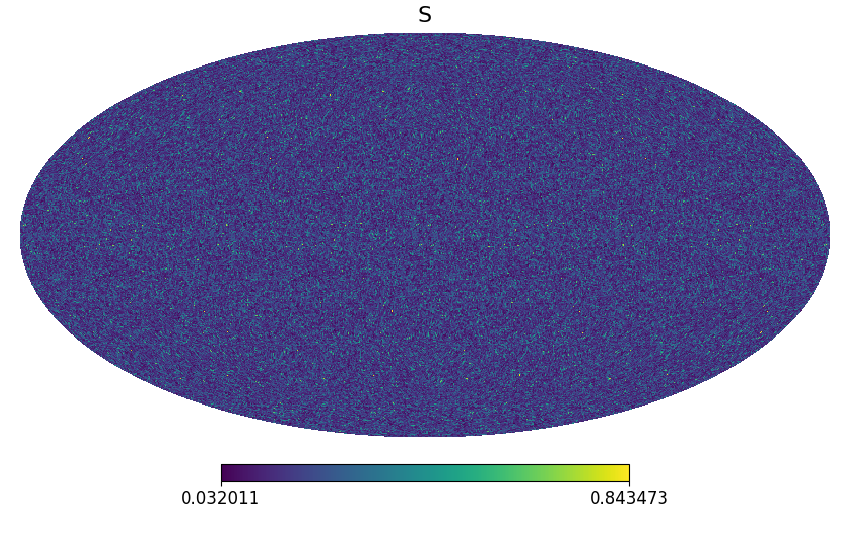

<IPython.core.display.Javascript object>


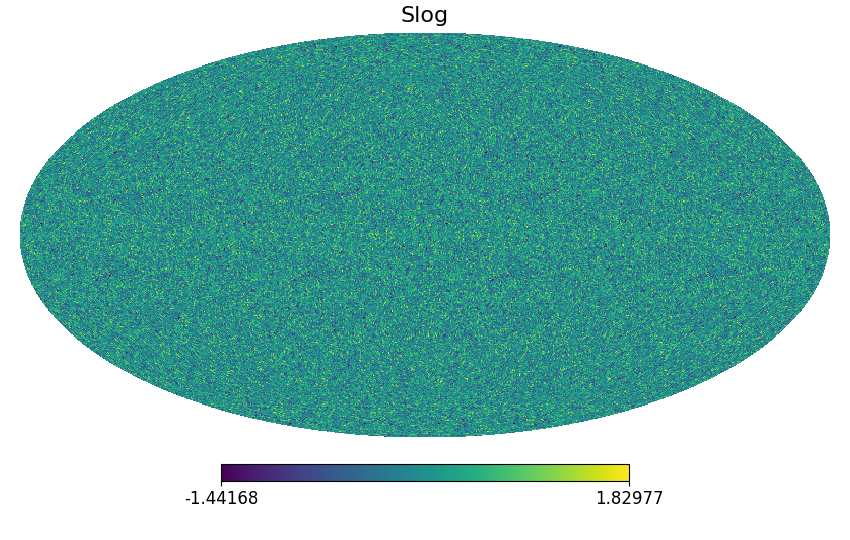

In [9]:
S = hp.read_map(image_file, 0, h=False)
S = hp.ud_grade(S, nside_out=nside)
hp.mollview(S, min=None, max=None, title='S')

Slog = np.log(S) + 2
hp.mollview(Slog, min=None, max=None, title='Slog')

## CMB with PySM

In [ ]:
### CMB from PySM
S, S_lm = sphlib.make_pysm_sky(L=L, sky_type='cmb', sampling='healpix', normalize=True)
print(S.shape, S_lm.shape)

#In the function above, if reality=True, only positive m are stored
print(S_lm.shape)
S_lm = sphlib.make_flm_full(S_lm, L)
print(S_lm.shape)

## CMB with CAMB

In [ ]:
##### CAMB
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams(WantCls=True, Want_CMB=True, WantScalars=True)
#This function sets up with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: 
    print(name)

unlensedCL = powers['unlensed_scalar']
TT = unlensedCL[:, 0]
print(TT.shape)

plt.figure()
plt.plot(TT)

### Divide TT by l(l+1)/2pi to respect healpix format
ell = np.arange(TT.size)
factor = ell * (ell + 1.) / 2. / np.pi
TT[2:] /= factor[2:]

plt.figure()
plt.plot(TT)
plt.yscale('log')

#Make the map
np.random.seed()
S = hp.sphtfunc.synfast(TT, nside=nside, lmax=2500, pol=False)
S = sphlib.normalize_map(S)
hp.mollview(S, min=-3, max=3, title='S')

## Gaussian white noise to test

In [ ]:
### White noise Gaussian
# Using S2FFT
S = np.random.randn(12*nside**2)
S_lm = s2fft.forward_jax(S, L=L, nside=nside, reality=True, sampling='healpix')
S = s2fft.inverse_jax(S_lm, L=L, nside=nside, reality=True, sampling='healpix')
S = np.real(S)
# Using Healpix
#lmax = 3*nside-1
#S = np.random.randn(12*nside**2)
#S_lm = hp.map2alm(S, lmax=lmax)
#S =  hp.alm2map(S_lm, nside=nside)

## Plot the map S

<IPython.core.display.Javascript object>


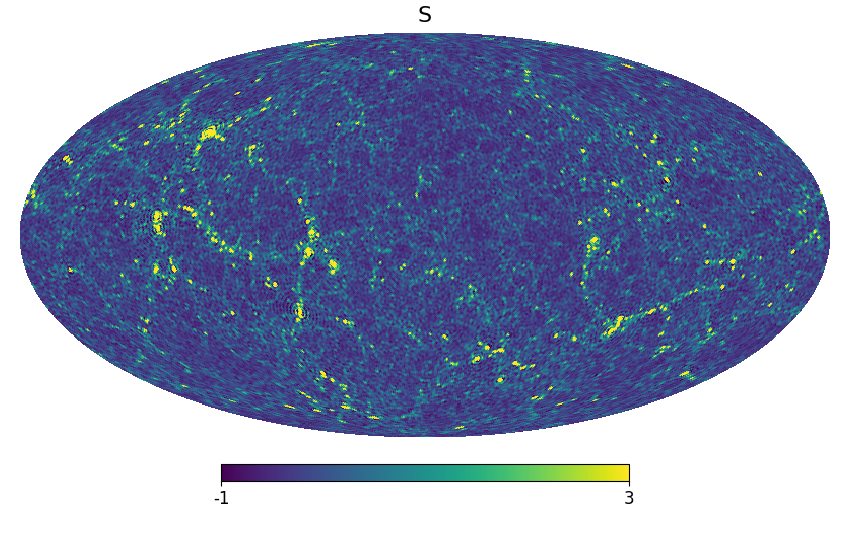

In [7]:
hp.mollview(S, min=-1, max=3, title='S')

# Make S'

In [13]:
nreals = 1
WN, Sprime = np.zeros((nreals, S.size), dtype=np.float64), np.zeros((nreals, S.size), dtype=np.float64)
WN_lm, Sprime_lm = np.zeros((nreals, L, 2*L-1), dtype=np.complex128), np.zeros((nreals, L, 2*L-1), dtype=np.complex128)

for r in range(nreals):
    print(r)
    WN[r, :] = np.random.randn(S.size)
    WN_lm[r, :] = s2fft.forward_jax(WN[r], L=L, nside=nside, reality=True, sampling='healpix')
    Sprime_lm[r, :] = np.abs(S_lm) * WN_lm[r] / np.abs(WN_lm[r])
    Sprime[r, :] = s2fft.inverse_jax(Sprime_lm[r], L=L, nside=nside, reality=True, sampling='healpix')
    
### Using Healpix
#nreals = 10
#WN, Sprime = np.zeros((nreals, S.size), dtype=np.float64), np.zeros((nreals, S.size), dtype=np.complex128)
#WN_lm, Sprime_lm = np.zeros((nreals, S_lm.size), dtype=np.complex128), np.zeros((nreals, S_lm.size), dtype=np.complex128)

#for r in range(nreals):
 #   print(r)
  #  WN[r, :] = np.random.randn(S.size)
   # WN_lm[r, :] = hp.map2alm(WN[r, :], lmax=lmax)
    #Sprime_lm[r, :] = np.abs(S_lm) * WN_lm[r] / np.abs(WN_lm[r])
    #Sprime[r, :] = hp.alm2map(Sprime_lm[r, :], nside=nside)


0


In [14]:
Sprime_lm

array([[[        nan       +nanj,         nan       +nanj,
                 nan       +nanj, ...,         nan       +nanj,
                 nan       +nanj,         nan       +nanj],
        [        nan       +nanj,         nan       +nanj,
                 nan       +nanj, ...,         nan       +nanj,
                 nan       +nanj,         nan       +nanj],
        [        nan       +nanj,         nan       +nanj,
                 nan       +nanj, ...,         nan       +nanj,
                 nan       +nanj,         nan       +nanj],
        ...,
        [        nan       +nanj,         nan       +nanj,
         -0.00896116-0.02534075j, ...,  0.00896116-0.02534075j,
                 nan       +nanj,         nan       +nanj],
        [        nan       +nanj, -0.00205791-0.00762493j,
          0.05480182+0.09516041j, ..., -0.05480182+0.09516041j,
         -0.00205791+0.00762493j,         nan       +nanj],
        [-0.03861222-0.04992693j,  0.01536371+0.02292837j,
         -0.0

<IPython.core.display.Javascript object>


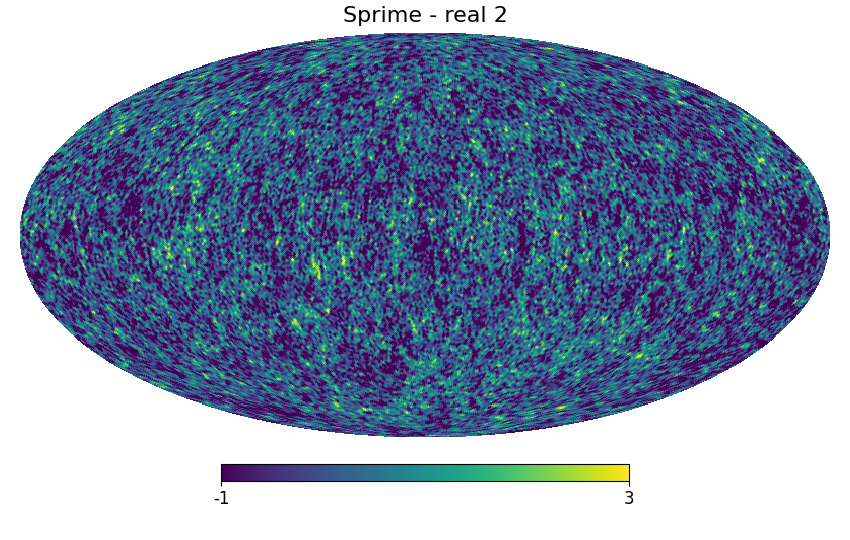

In [9]:
r = 2
hp.mollview(Sprime[r, :], min=-1, max=3, title=f'Sprime - real {r}')

# Compare the stats on S and Sprime

## Power spectrum

By construction S and S' should have the same PS

In [10]:
ps_S = sphlib.compute_ps(S_lm)
print(ps_S.shape)

ps_WN, ps_Sprime = np.zeros((nreals, ps_S.size)), np.zeros((nreals, ps_S.size))
for r in range(nreals):
    ps_Sprime[r] = sphlib.compute_ps(Sprime_lm[r])
    ps_WN[r] = sphlib.compute_ps(WN_lm[r])
    
### With Healpix
#ps_S = hp.anafast(S, lmax=lmax)
#print(ps_S.shape)

#ps_WN, ps_Sprime = np.zeros((nreals, ps_S.size)), np.zeros((nreals, ps_S.size))
#for r in range(nreals):
 #   ps_Sprime[r] = hp.anafast(Sprime[r], lmax=lmax)
  #  ps_WN[r] = hp.anafast(WN[r], lmax=lmax)

(256,)


In [11]:
mean_ps_WN = np.mean(ps_WN, axis=0)
std_ps_WN = np.std(ps_WN, axis=0)

mean_ps_Sprime = np.mean(ps_Sprime, axis=0)
std_ps_Sprime = np.std(ps_Sprime, axis=0)

<IPython.core.display.Javascript object>


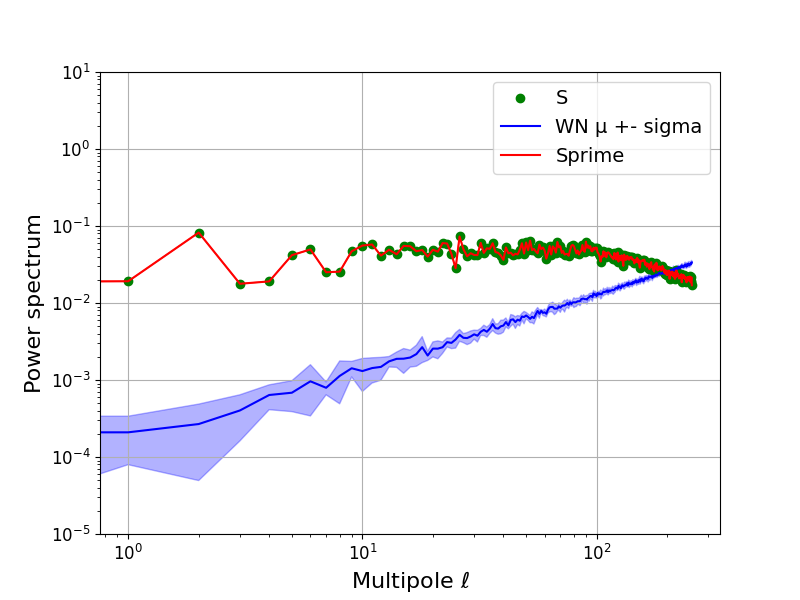

In [12]:
ll = np.arange(L)
factor = 2*ll+1
#factor = ll * (ll + 1.) / 2. / np.pi

plt.figure(figsize=(8, 6))

plt.plot(ll, ps_S, 'go', label="S")

plt.plot(ll, mean_ps_WN, 'b', label="WN µ +- sigma")
plt.fill_between(ll, mean_ps_WN - std_ps_WN, mean_ps_WN + std_ps_WN, color='b', alpha=0.3)

plt.plot(ll, mean_ps_Sprime, 'r', label="Sprime")
plt.fill_between(ll, mean_ps_Sprime - std_ps_Sprime, mean_ps_Sprime + std_ps_Sprime, color='r', alpha=0.3)

plt.yscale("log")
plt.xscale("log", base=10)
plt.xlabel(r'Multipole $\ell$')
plt.ylabel('Power spectrum')
plt.grid()
#plt.xlim(2, 256)
plt.ylim(1e-5, 1e1)
plt.legend()

## Histogram

<IPython.core.display.Javascript object>


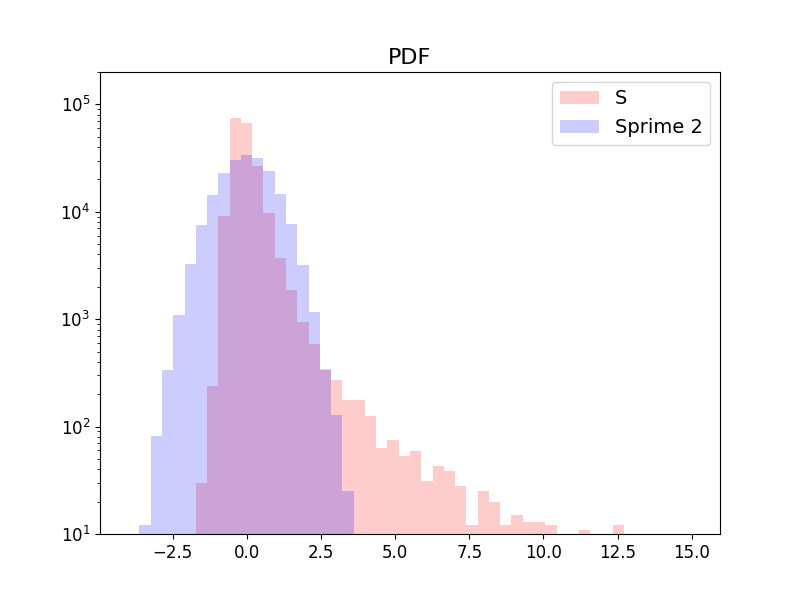

In [13]:
fig, ax0 = plt.subplots(1, 1, figsize=(8, 6))

histrange=(-4, 15)
r = 2
ax0.hist(S, bins=50, range=histrange, 
         density=False, color='r', alpha=0.2, label=f'S')
ax0.hist(Sprime[r], bins=50, range=histrange, 
         density=False, color='b', alpha=0.2, label=f'Sprime {r}')
#ax0.hist(WN[r], bins=30, range=(S.min(), S.max()), 
 #        density=False, color='g', alpha=0.2, label=f'WN {r}')
ax0.set_title('PDF')
ax0.set_yscale("log")
ax0.set_ylim(10, 2e5)
ax0.legend()

## Minkowski

In [14]:
def make_minkowski(us, map_hpx):

    data = mf.Healpix(map_hpx, normalise=True, mask=None)     # Default parameters
    v0 = mf.V0(data, us)
    v1 = mf.V1(data, us)
    v2 = mf.V2(data, us)
    
    return v0, v1, v2

In [15]:
us = np.arange(-5., 7.01, 0.1)

v0_S, v1_S, v2_S = make_minkowski(us, np.array(S))

v0_Sprime, v1_Sprime, v2_Sprime = np.zeros((nreals, us.size)), np.zeros((nreals, us.size)), np.zeros((nreals, us.size))
v0_WN, v1_WN, v2_WN = np.zeros((nreals, us.size)), np.zeros((nreals, us.size)), np.zeros((nreals, us.size))

for r in range(nreals):
    v0_Sprime[r], v1_Sprime[r], v2_Sprime[r] = make_minkowski(us, np.array(np.real(Sprime[r])))
    v0_WN[r], v1_WN[r], v2_WN[r] = make_minkowski(us, WN[r])

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

In [16]:
mean_v0_Sprime = np.mean(v0_Sprime, axis=0)
mean_v1_Sprime = np.mean(v1_Sprime, axis=0)
mean_v2_Sprime = np.mean(v2_Sprime, axis=0)

mean_v0_WN = np.mean(v0_WN, axis=0)
mean_v1_WN = np.mean(v1_WN, axis=0)
mean_v2_WN = np.mean(v2_WN, axis=0)

std_v0_Sprime = np.std(v0_Sprime, axis=0)
std_v1_Sprime = np.std(v1_Sprime, axis=0)
std_v2_Sprime = np.std(v2_Sprime, axis=0)

std_v0_WN = np.std(v0_WN, axis=0)
std_v1_WN = np.std(v1_WN, axis=0)
std_v2_WN = np.std(v2_WN, axis=0)

<IPython.core.display.Javascript object>


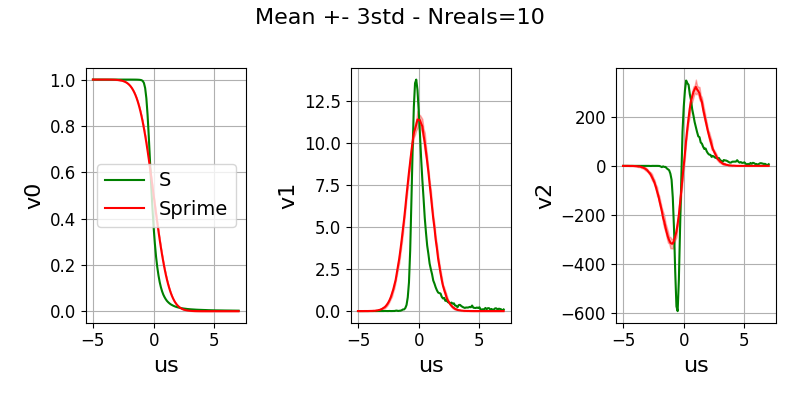

In [17]:
ns = 3 # Number of STD for the plot

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(8, 4))
fig.suptitle(f'Mean +- {ns}std - Nreals={nreals}')

ax0.plot(us, v0_S, color='g', label='S')
#ax0.plot(us, mean_v0_WN, 'b', label="WN")
#ax0.fill_between(us, mean_v0_WN - ns*std_v0_WN, mean_v0_WN + ns*std_v0_WN, color='b', alpha=0.3)
ax0.plot(us, mean_v0_Sprime, 'r', label="Sprime")
ax0.fill_between(us, mean_v0_Sprime - ns*std_v0_Sprime, mean_v0_Sprime + ns*std_v0_Sprime, color='r', alpha=0.3)
ax0.set_xlabel('us')
ax0.set_ylabel('v0')
ax0.grid()
ax0.legend()

ax1.plot(us, v1_S, 'g', label='S')
#ax1.plot(us, mean_v1_WN, 'b', label="WN")
#ax1.fill_between(us, mean_v1_WN - ns*std_v1_WN, mean_v1_WN + ns*std_v1_WN, color='b', alpha=0.3)
ax1.plot(us, mean_v1_Sprime, 'r', label="Sprime")
ax1.fill_between(us, mean_v1_Sprime - ns*std_v1_Sprime, mean_v1_Sprime + ns*std_v1_Sprime, color='r', alpha=0.3)
ax1.set_xlabel('us')
ax1.set_ylabel('v1')
ax1.grid()
#ax1.legend()

ax2.plot(us, v2_S, color='g', label='S')
#ax2.plot(us, mean_v2_WN, 'b', label="WN")
#ax2.fill_between(us, mean_v2_WN - ns*std_v2_WN, mean_v2_WN + ns*std_v2_WN, color='b', alpha=0.3)
ax2.plot(us, mean_v2_Sprime, 'r', label="Sprime")
ax2.fill_between(us, mean_v2_Sprime - ns*std_v2_Sprime, mean_v2_Sprime + ns*std_v2_Sprime, color='r', alpha=0.3)
ax2.set_xlabel('us')
ax2.set_ylabel('v2')
ax2.grid()
#ax2.legend()

fig.tight_layout()

<IPython.core.display.Javascript object>


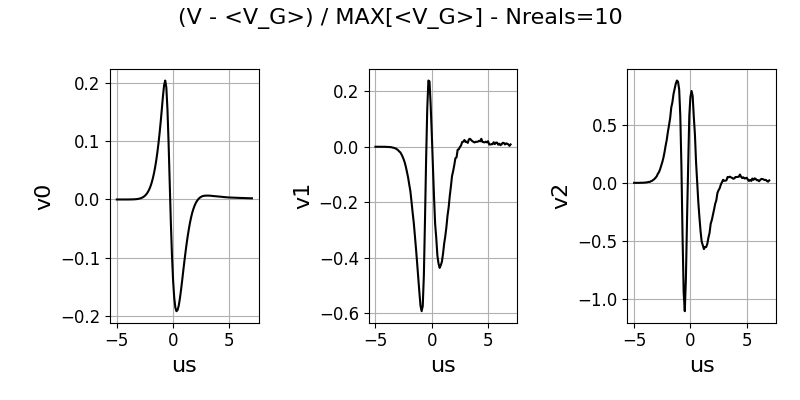

In [18]:
ns = 3 # Number of STD for the plot

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(8, 4))
fig.suptitle(f'(V - <V_G>) / MAX[<V_G>] - Nreals={nreals}')

ax0.plot(us, (v0_S - mean_v0_Sprime)/np.max(mean_v0_Sprime), color='k')
ax0.set_xlabel('us')
ax0.set_ylabel('v0')
ax0.grid()

ax1.plot(us, (v1_S - mean_v1_Sprime)/np.max(mean_v1_Sprime), color='k')
ax1.set_xlabel('us')
ax1.set_ylabel('v1')
ax1.grid()
#ax1.legend()

ax2.plot(us, (v2_S - mean_v2_Sprime)/np.max(mean_v2_Sprime), color='k')
ax2.set_xlabel('us')
ax2.set_ylabel('v2')
ax2.grid()
#ax2.legend()

fig.tight_layout()